# ASSIGNMENT 2
---
### LINEAR REGRESSION
---

Dataset : Solar Radiation Prediction
https://www.kaggle.com/dronio/SolarEnergy

The dataset containes columns like Wind Speed, Temperature, Humidity, Pressure, Timestamp, Sunrise and Sunset timings and Wind Direction. The response parameter to be predicted is "Radiation"

**Importing Packages**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

#scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#statsmodel
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as sm

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Cross-validation
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline

C:\Users\chava\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\chava\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


**Reading the dataset to find null values, if any**

In [6]:
sun = pd.read_csv('Solar.csv')
sun.head()


,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 0:00,23:55:26,1.21,48,30.46,59,177.39,5.62,6:13:00,18:13:00
1,1475229023,9/29/2016 0:00,23:50:23,1.21,48,30.46,58,176.78,3.37,6:13:00,18:13:00
2,1475228726,9/29/2016 0:00,23:45:26,1.23,48,30.46,57,158.75,3.37,6:13:00,18:13:00
3,1475228421,9/29/2016 0:00,23:40:21,1.21,48,30.46,60,137.71,3.37,6:13:00,18:13:00
4,1475228124,9/29/2016 0:00,23:35:24,1.17,48,30.46,62,104.95,5.62,6:13:00,18:13:00


In [6]:
sun.shape

(32686, 11)

In [3]:
sun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
UNIXTime                  32686 non-null int64
Data                      32686 non-null object
Time                      32686 non-null object
Radiation                 32686 non-null float64
Temperature               32686 non-null int64
Pressure                  32686 non-null float64
Humidity                  32686 non-null int64
WindDirection(Degrees)    32686 non-null float64
Speed                     32686 non-null float64
TimeSunRise               32686 non-null object
TimeSunSet                32686 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


Looks like we've got a clean dataset. So we move forward to see if there is correlation between variable to base our linear model upon.

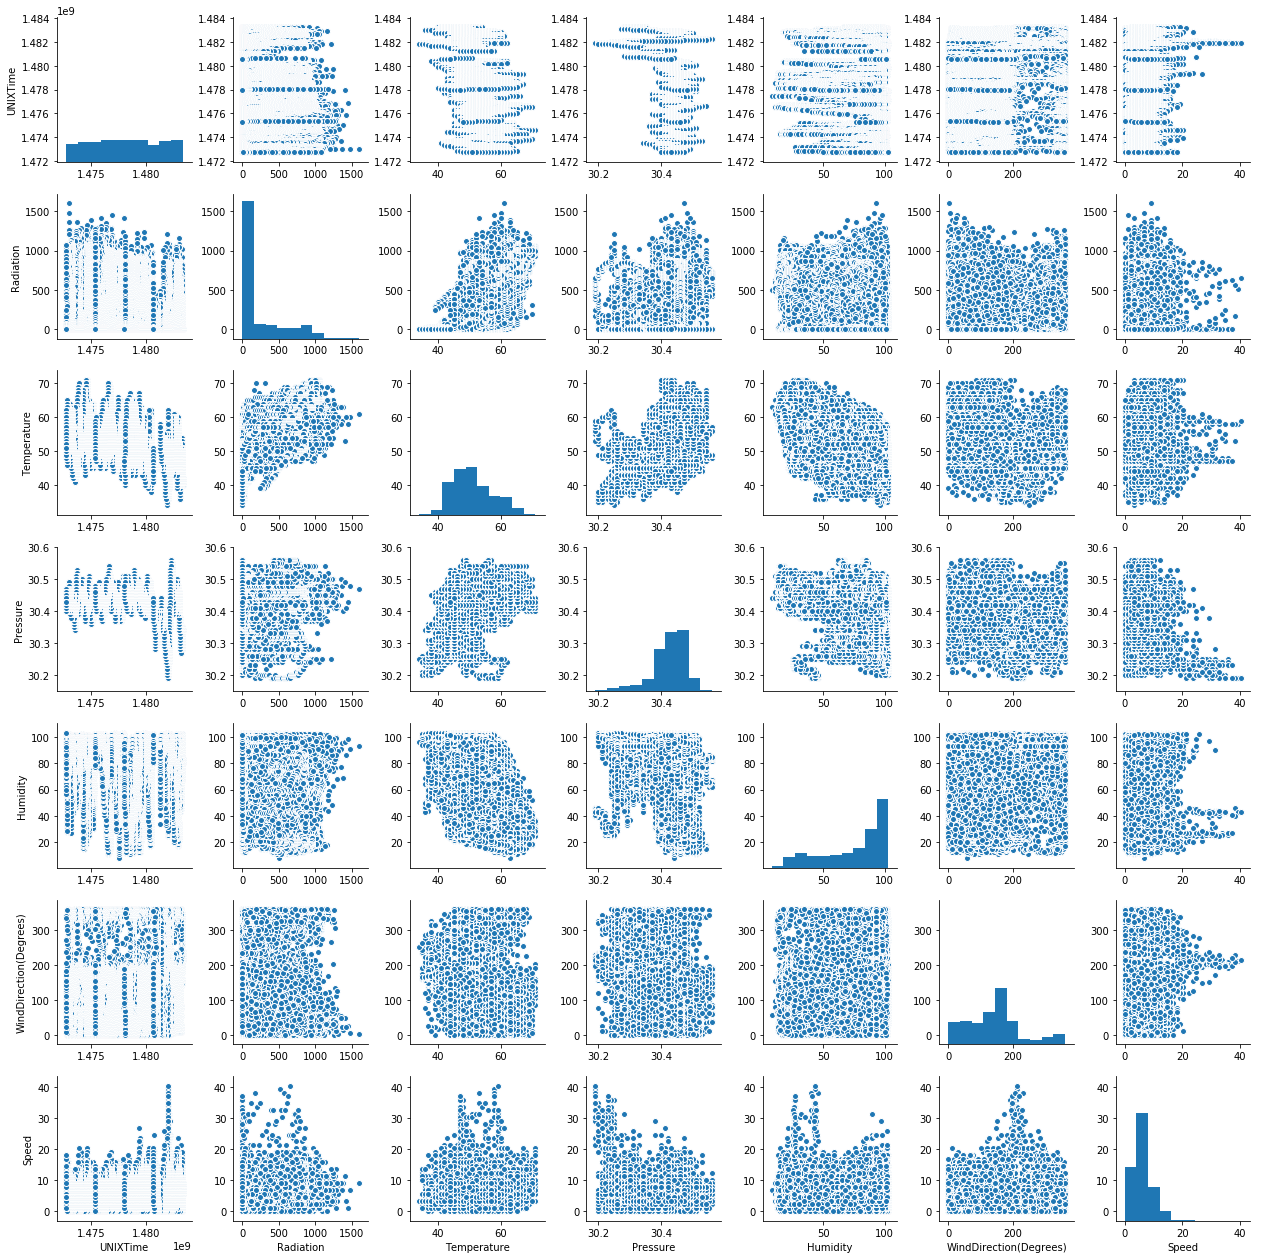

In [7]:
#Quick plot using seaborn
sns.pairplot(sun)

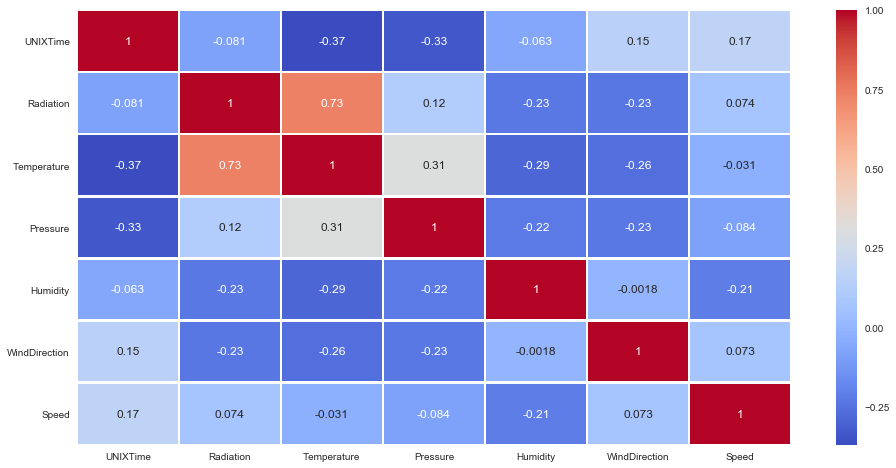

In [176]:
plt.figure(figsize = (16,8))
sns.heatmap(sun.corr(), annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths = '1.5')

From the figure above, we see that Radiation and Temperature seem to highly correlated as compared to other variables. So we will use Temperature as one of a predictor variable in the model. 

### Radiation vs Temperature
---

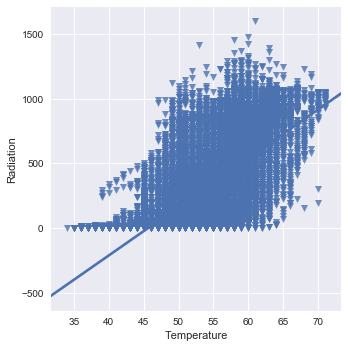

In [179]:
sns.set(rc={'figure.figsize':(16,8)})
sns.lmplot(y="Radiation", x="Temperature", data=sun, markers = 'v')

We can't really infer much from the linear plot so lets try using a point plot for a better understanding of the relationship.

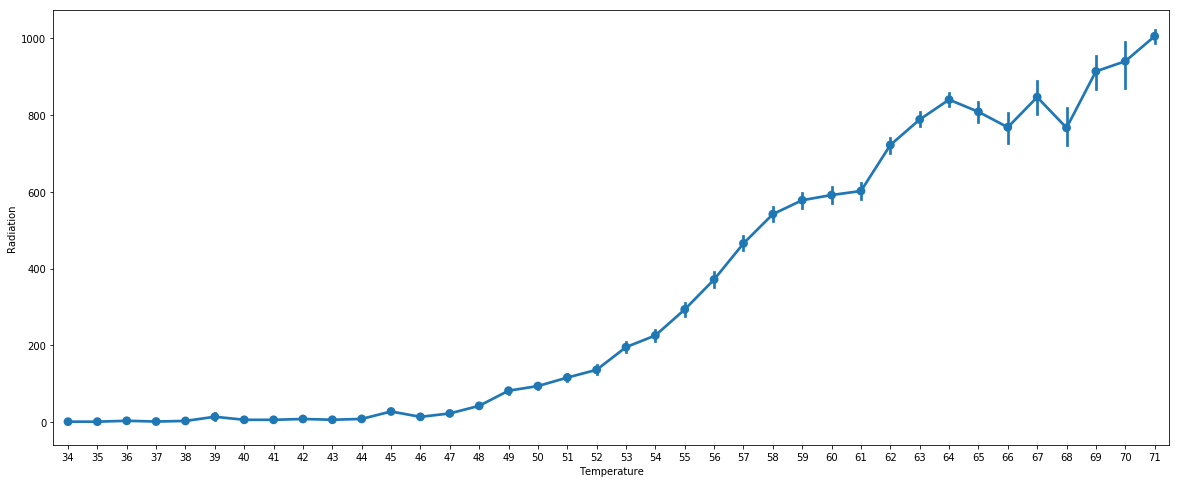

In [10]:
plt.figure(figsize = (20,8))
sns.pointplot(sun['Temperature'],sun['Radiation'])

The relationship seems to fairly clear through the point plot. We proceed to fit a model to our variables.

**MODEL:**

In [77]:
X = sun[["Temperature"]]
y = sun[["Radiation"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-1706.28764763] [[ 37.44208342]]


This means that our best fit line is:
$$y = a + b x$$

Which translates in to the equations below:

$$ y_{Radiation} = -1706.28 + 37.44 x_{Temperature} + \varepsilon $$  


Next let's use statsmodels for statistical output.

In [78]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                 2.023e+04
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:13:42   Log-Likelihood:            -2.3247e+05
No. Observations:               32686   AIC:                         4.649e+05
Df Residuals:                   32685   BIC:                         4.650e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     4.5376      0.032    142.245      0.000       4.475       4.600
==============================================================================
Omnibus:                     6474.933   Durbin-Watson:                   0.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11060.108
Skew:                           1.393   Prob(JB):                         0.00
Kurtosis:                       3.599   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  Temperature    4.537559
dtype: float64
R2:  0.382352170296


Text(0.5,1,'Radiation vs Temperature')

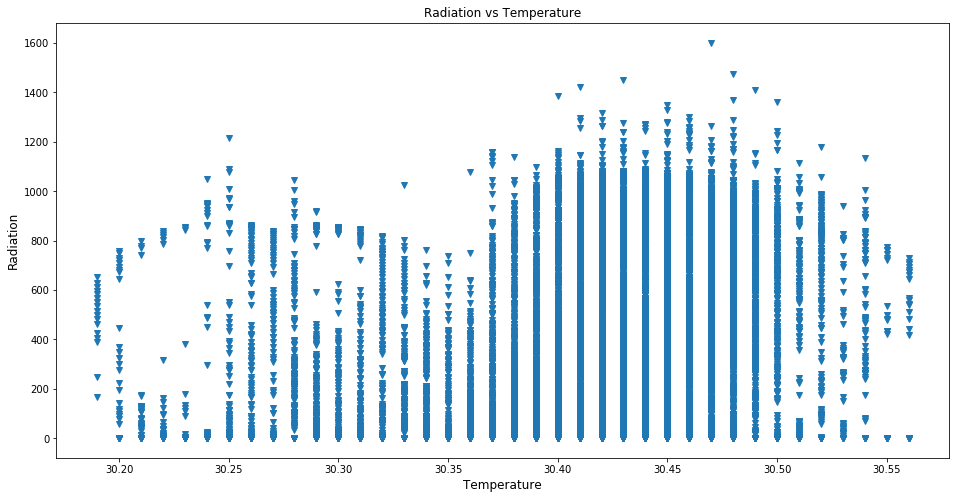

In [92]:
plt.figure(figsize = (16,8))
plt.plot(X,y,'v')
plt.xlabel('Temperature',fontsize = 12)
plt.ylabel('Radiation', fontsize = 12)
plt.title('Radiation vs Temperature', fontsize = 12)

The above model between Radiation and Temperature has a R-squared value close to 38% and co-efficient of 4.53 which means the predictor has lesser impact on outcome.

### Radiation vs Humidity
---

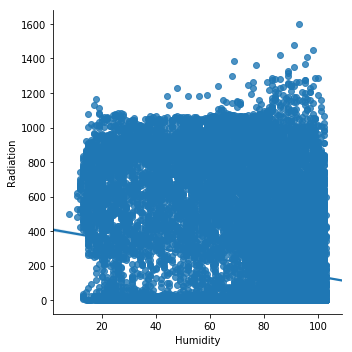

In [15]:
plt.figure(figsize = (16,8))
sns.lmplot(y="Radiation", x="Humidity", data=sun, markers = 'o')

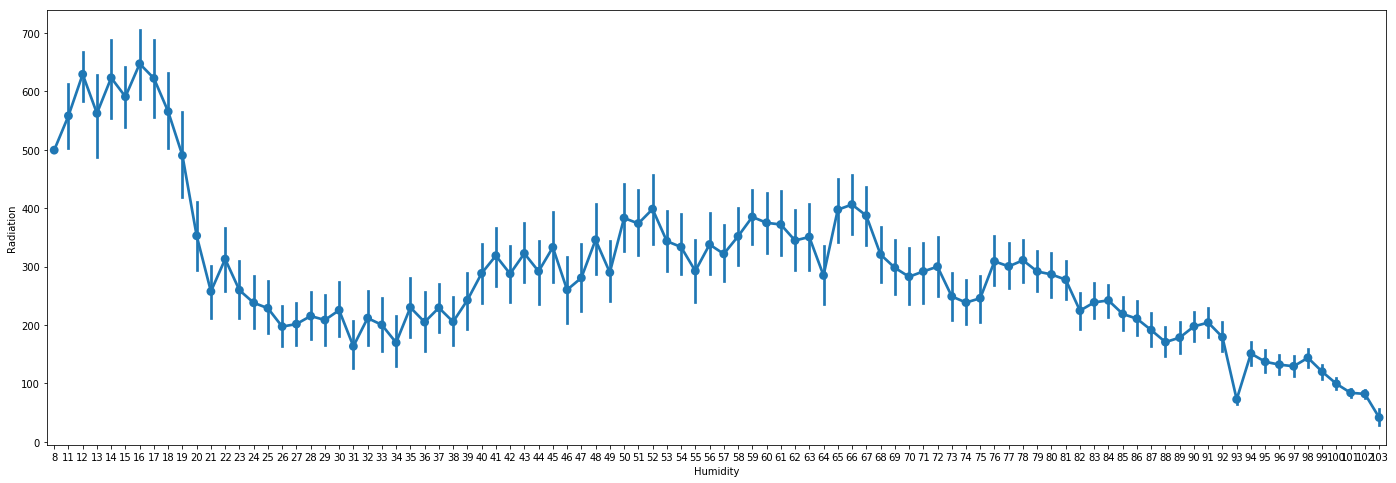

In [47]:
plt.figure(figsize = (24,8))
sns.pointplot(sun['Humidity'],sun['Radiation'])

**MODEL :**

In [74]:
X = sun[["Humidity"]]
y = sun[["Radiation"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[ 413.35578996] [[-2.74915017]]


In [95]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     8589.
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:18:44   Log-Likelihood:            -2.3653e+05
No. Observations:               32686   AIC:                         4.731e+05
Df Residuals:                   32685   BIC:                         4.731e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Humidity       2.1705      0.023     92.675      0.000       2.125       2.216
==============================================================================
Omnibus:                     6100.895   Durbin-Watson:                   0.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10157.692
Skew:                           1.344   Prob(JB):                         0.00
Kurtosis:                       3.486   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Radiation vs Humidity')

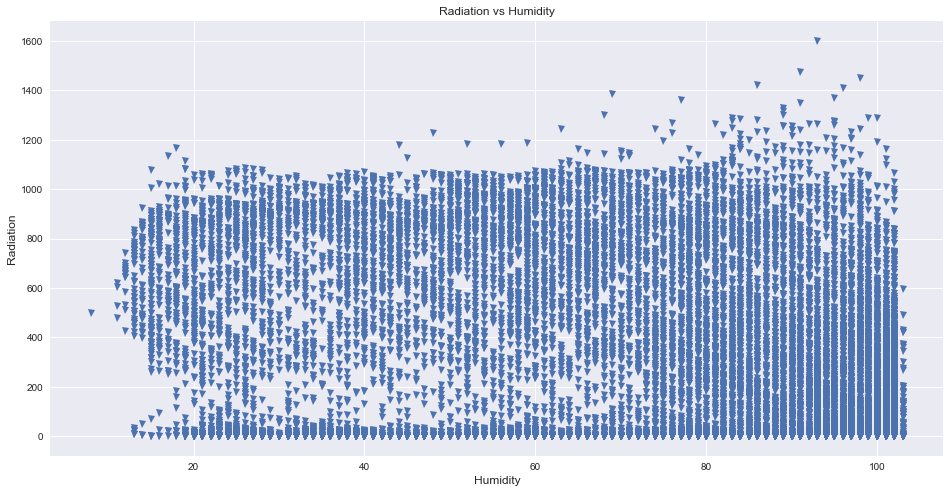

In [75]:
plt.figure(figsize = (16,8))
plt.plot(X,y,'v')
plt.xlabel('Humidity',fontsize = 12)
plt.ylabel('Radiation', fontsize = 12)
plt.title('Radiation vs Humidity', fontsize = 12)

The above model between Radiation and Humidity has a R-squared value close to 20% and co-efficient of 2.17 showing lesser impact of predictor on target variable.

### Radiation vs Pressure

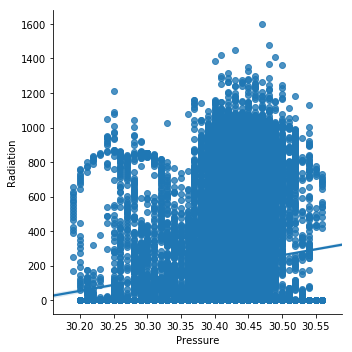

In [154]:
plt.figure(figsize = (16,8))
sns.lmplot(y="Radiation", x="Pressure", data=sun, markers = 'o')

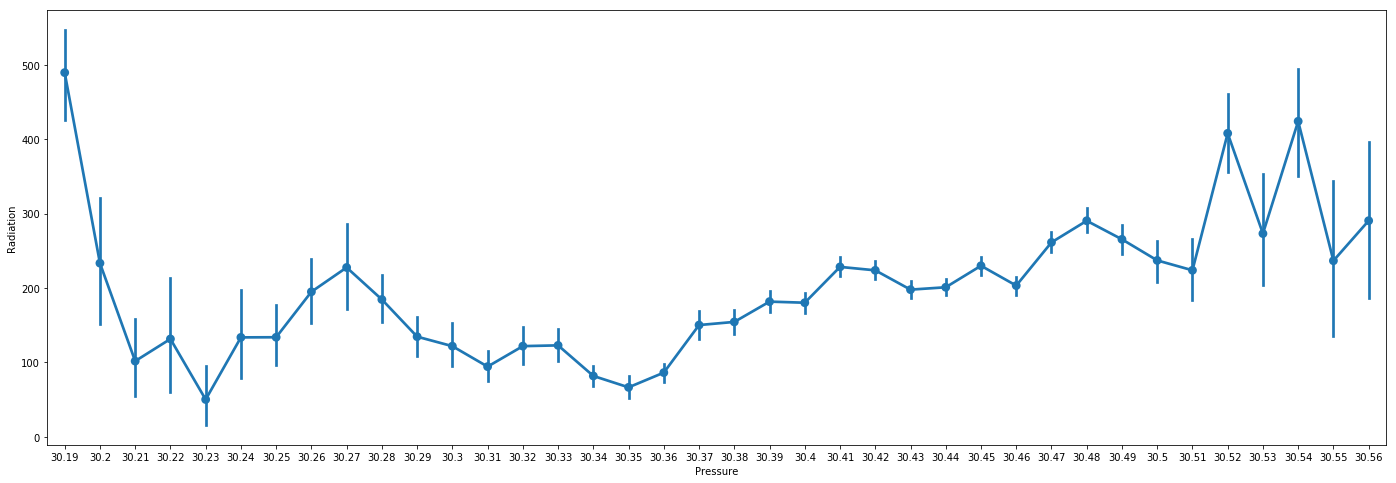

In [23]:
plt.figure(figsize = (24,8))
sns.pointplot(sun['Pressure'],sun['Radiation'])

**MODEL :**

In [100]:
X = sun[["Pressure"]]
y = sun[["Radiation"]]

# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)

# Print the coefficients
print (results.intercept_, results.coef_)

[-20714.83820666] [[ 687.70490022]]


In [101]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 1.406e+04
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:19:40   Log-Likelihood:            -2.3450e+05
No. Observations:               32686   AIC:                         4.690e+05
Df Residuals:                   32685   BIC:                         4.690e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pressure       6.8104      0.057    118.588      0.000       6.698       6.923
==============================================================================
Omnibus:                     6270.450   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10572.811
Skew:                           1.370   Prob(JB):                         0.00
Kurtosis:                       3.511   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Radiation vs Pressure')

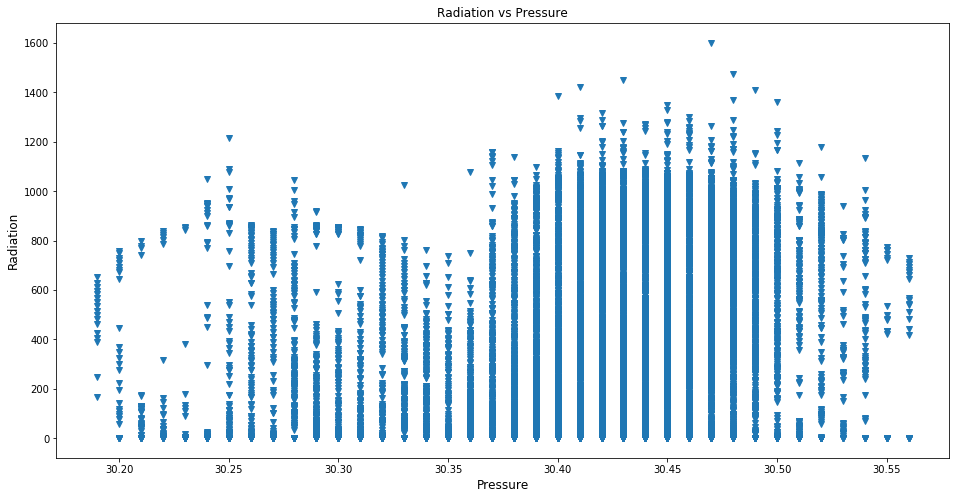

In [102]:
plt.figure(figsize = (16,8))
plt.plot(X,y,'v')
plt.xlabel('Pressure',fontsize = 12)
plt.ylabel('Radiation', fontsize = 12)
plt.title('Radiation vs Pressure', fontsize = 12)

The above model between Radiation and Pressure has a R-squared value close to 30% and co-efficient of 6.81 which means the predictor has lesser impact on outcome.

### Radiation vs (Temperature, Pressure, Humidity)
----

In [23]:
#Splitting features(X) and target variable(y)
X = sun[['Temperature','Humidity','Pressure']]
y = sun['Radiation']

#Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#Creating and training Model
lm = LinearRegression()
lm.fit(X_train,y_train)

#Model evaluation
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

20564.8228864


,Coefficient
Temperature,38.731040
Humidity,-0.483672
Pressure,-733.087978


Now, lets grab predictions off of our model and see how well it did!

Text(0.5,1,'Linear Regression')

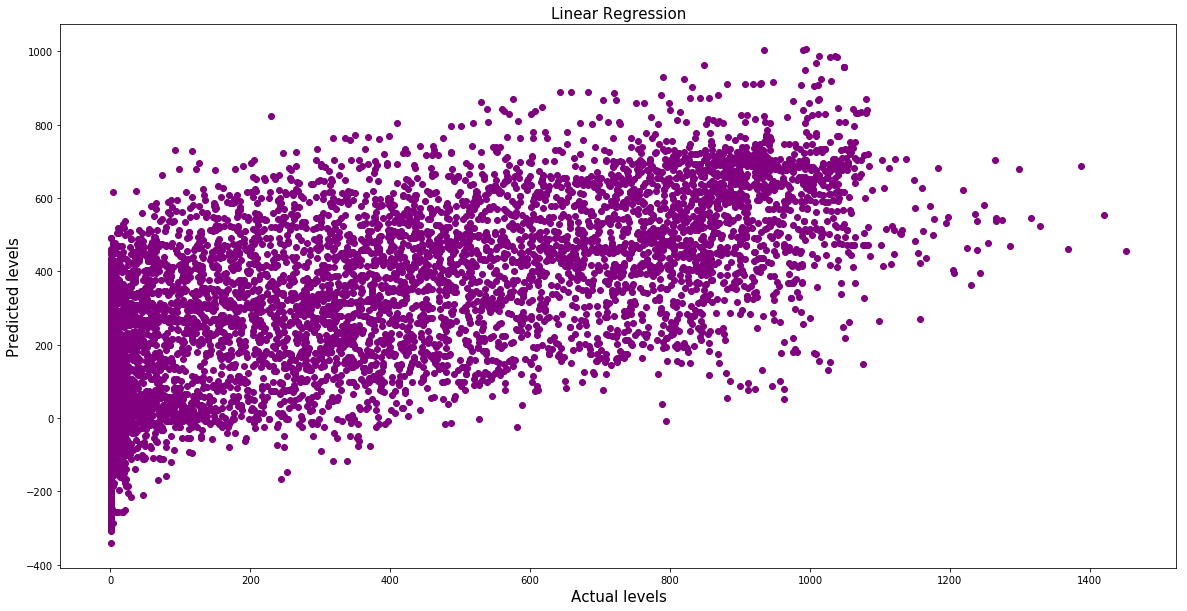

In [24]:
plt.figure(figsize = (20,10))

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions, color ='purple')
plt.xlabel("Actual levels", fontsize = 15)
plt.ylabel("Predicted levels", fontsize = 15)
plt.title("Linear Regression", fontsize = 15)

In [120]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 2.316e+04
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:55:34   Log-Likelihood:            -2.2172e+05
No. Observations:               32686   AIC:                         4.434e+05
Df Residuals:                   32683   BIC:                         4.435e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    37.4042      0.200    187.304      0.000      37.013      37.796
Humidity       -0.2248      0.047     -4.744      0.000      -0.318      -0.132
Pressure      -55.4698      0.387   -143.239      0.000     -56.229     -54.711
==============================================================================
Omnibus:                     2573.185   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3475.562
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                       3.848   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above model between has a R-squared value close to 68% which shows better impact of predictor variable on target variable. 

**Evaluating Regression Model :**

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 160.016753189
MSE: 44725.6245628
RMSE: 211.484336448


### (1) Does the model make sense?

The model does make sense while figuring out multivariate regression between Radiation and a bundle of weather parameters but when it comes to single regressions, it does not make much of a sense!

### (2) Is the relationship significant?

We have defined two types of relationships for our analysis that goes as follows:
- Relation between **Radiation level** and **Temperature, Humidity and Pressure** separately
- Relation between **Radiation level** and **Temperature, Humidity, Pressure, Wind speed, Wind direction** 

After reviewing, we observe that there is a positive linearity between **Radiation** and **Temperature** which is true, for e.g when an object is hot enough, it emits visible light. However, the same cannot be said as far as Humidity and Pressure is concerned. Although, it does not mean that there is no linearity, only not enough to draw a firm conclusion.

On the other side, when we model **Radiation** against the rest of the parameters including **Wind speed** and **direction**, we can observe some sort of a positive linearity. 

### (3) Is there any multicolinearity in the model?

Yes, there is a slight multicolinearity in the model. From the table below, we know that **Temperature** and **Pressure** are correlated to some extent. But a little bit of multicolinearity will not affect the prediction as long as the outcome variable is determined using a bundle of correlated predictors, for e.g **(Temperature, Pressure, Humidity, Wind speed, Direction)** in our model. 

In [103]:
sun.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection,0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


### (4) In the multiple regression models are predictor variables independent of all the other predictor variables?  

No, they are not! As discussed above, predictor variables are not independent to all other variable due to existing correlation between Temperature and Pressure.

### (5) In multiple regression, does model rank the most significant predictor variables and exclude insignificant ones from the model?

No a multivariate model does not exclude the insignificant predictor variables. Following the statsmodels given below, one can infer that adding additional variable changes the R-Squared value slightly. It may seem trivial, but in context of prediction, it will matter.

In [123]:
A = ols("Radiation ~ Temperature + Humidity + Pressure - 1", data=sun).fit()
A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                 2.316e+04
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:58:21   Log-Likelihood:            -2.2172e+05
No. Observations:               32686   AIC:                         4.434e+05
Df Residuals:                   32683   BIC:                         4.435e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    37.4042      0.200    187.304      0.000      37.013      37.796
Humidity       -0.2248      0.047     -4.744      0.000      -0.318      -0.132
Pressure      -55.4698      0.387   -143.239      0.000     -56.229     -54.711
==============================================================================
Omnibus:                     2573.185   Durbin-Watson:                   0.182
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3475.562
Skew:                           0.677   Prob(JB):                         0.00
Kurtosis:                       3.848   Cond. No.                         35.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [125]:
B = ols("Radiation ~ Temperature + Humidity + Pressure + Speed - 1", data=sun).fit()
B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                 1.788e+04
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:59:01   Log-Likelihood:            -2.2140e+05
No. Observations:               32686   AIC:                         4.428e+05
Df Residuals:                   32682   BIC:                         4.428e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature    37.8984      0.199    190.764      0.000      37.509      38.288
Humidity        0.0573      0.048      1.190      0.234      -0.037       0.152
Pressure      -58.8058      0.405   -145.217      0.000     -59.600     -58.012
Speed           8.8223      0.344     25.611      0.000       8.147       9.497
==============================================================================
Omnibus:                     2476.465   Durbin-Watson:                   0.205
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3293.760
Skew:                           0.665   Prob(JB):                         0.00
Kurtosis:                       3.805   Cond. No.                         39.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
C = ols("Radiation ~ Temperature + Humidity + Pressure + Speed + WindDirection - 1", data=sun).fit()
C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Radiation   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                 1.441e+04
Date:                Tue, 13 Feb 2018   Prob (F-statistic):               0.00
Time:                        22:59:18   Log-Likelihood:            -2.2131e+05
No. Observations:               32686   AIC:                         4.426e+05
Df Residuals:                   32681   BIC:                         4.427e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Temperature      37.1903      0.205    181.046      0.000      36.788      37.593
Humidity          0.0162      0.048      0.336      0.737      -0.078       0.111
Pressure        -56.6638      0.436   -130.002      0.000     -57.518     -55.810
Speed             9.0550      0.344     26.320      0.000       8.381       9.729
WindDirection    -0.1906      0.015    -13.074      0.000      -0.219      -0.162
==============================================================================
Omnibus:                     2488.806   Durbin-Watson:                   0.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3317.671
Skew:                           0.667   Prob(JB):                         0.00
Kurtosis:                       3.811   Cond. No.                         78.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (6) Are any of model assumptions violated?

Text(0.5,1,'Residual Distribution')

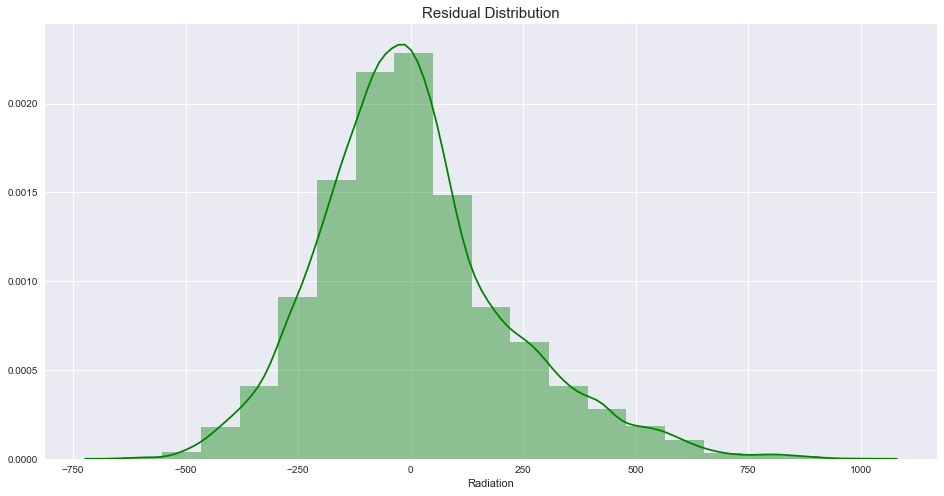

In [41]:
sns.set(rc={'figure.figsize':(16,8)})1
sns.distplot((y_test-predictions),bins=19, color = 'Green');
plt.title('Residual Distribution', fontsize = '15')

In [60]:
residual2 = (y_test-predictions)
residual2

8362      35.103867
25423    161.686770
27791    102.509778
27344     79.075879
21481    102.683619
30184    -78.601847
6046     -41.177500
25429    161.097305
13331    136.850038
13358   -189.015019
25590    167.622425
7228    -384.246374
26793      6.364366
21985   -122.421478
18938    561.210138
1796    -434.904152
20695     -4.373223
10882   -137.648860
1827     -29.119196
2380     510.174110
16818   -117.013840
23610     56.059736
10410    618.066935
3429    -323.825435
24761     49.183260
28836   -147.468317
10702    515.090489
19323     41.890201
23587    -19.327653
12410    253.044552
            ...    
3055    -105.263749
691     -410.804856
18257    102.453743
1706    -254.325652
3704    -278.272981
28289     44.766078
15866     27.368196
16223   -175.734277
21723   -315.544280
21704   -164.422432
5476    -133.529252
15505   -158.000930
22453     31.069270
14239    -61.837570
18365    439.678820
13855    197.415309
1138     -98.588493
27398     34.115649
2026    -221.816196


In [52]:
results = sm.ols(formula='Radiation ~ Temperature', data=sun).fit()
Radiation_pred = results.predict(sun[["Temperature"]])
residual = sun["Radiation"].values-Radiation_pred
residual

0        -89.722357
1        -89.722357
2        -89.702357
3        -89.722357
4        -89.762357
5        -89.722357
6       -127.174440
7       -127.134440
8       -127.144440
9       -127.164440
10      -127.144440
11      -127.164440
12      -127.154440
13      -164.606524
14      -164.586524
15      -164.596524
16      -164.606524
17      -164.596524
18      -164.596524
19      -164.616524
20      -164.616524
21      -164.616524
22      -164.606524
23      -164.596524
24      -164.596524
25      -164.596524
26      -164.576524
27      -164.586524
28      -164.586524
29      -164.586524
            ...    
32656    134.890144
32657    134.920144
32658     97.458060
32659     97.458060
32660     97.468060
32661     97.488060
32662     97.478060
32663     97.478060
32664     97.468060
32665     97.468060
32666     60.045977
32667     60.045977
32668     60.035977
32669     60.045977
32670     60.045977
32671     60.045977
32672     60.035977
32673     60.045977
32674     97.488060


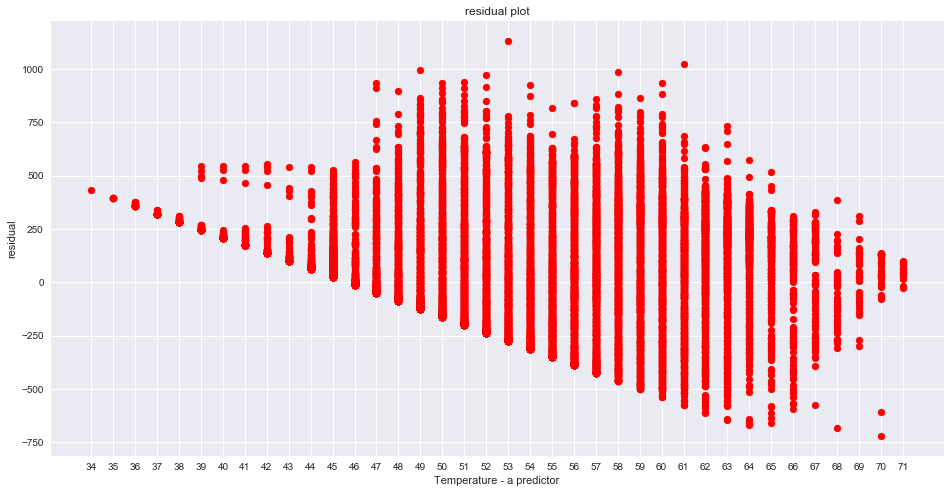

In [55]:
plt.figure(figsize = (16,8))
plt.scatter(sun[["Temperature"]],residual, color = 'red')
plt.xlabel("Temperature - a predictor")
plt.ylabel("residual")
plt.title("residual plot")
plt.show()

As we can see that plot is not a random scatter plot instead this plot is forming a linearity. 
There are some differences that can be seen in the vertical spread of the residuals and thus there is some variance of error terms.Also it has been seen previously the predictor variable are not linearly independent i.e there is multicolinearity.

Thus 2 assumptions are violated:
- Equal variances of errors
- No multicolinearity between explanatory/predictor variables

### (7) Does regularization help with creating models that validate better on out of sample data?

Performing regularization using Ridge Regression.

**Importing packages**

In [3]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.cross_validation import KFold, cross_val_score, train_test_split


**Creating training and test data**

In [28]:
#Splitting features(X) and target variable(y)
A = sun[['Temperature','Humidity','Pressure']]
b = sun['Radiation']

#Splitting dataset into training and testing
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.7, random_state=101)

#Creating and training Model
lm = LinearRegression()
lm.fit(A_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Ridge Regression with alpha of 0.5**

In [29]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Text(0.5,1,'Ridge Regression - Actual vs Predicted')

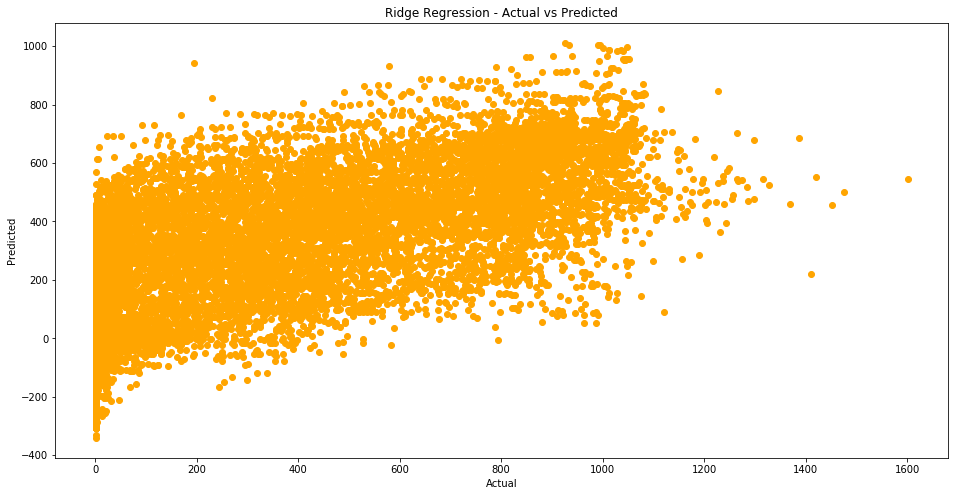

In [30]:
b_pred = ridge.predict(A_test)
plt.figure(figsize = (16,8))
plt.scatter(b_test, b_pred, color ='orange')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Ridge Regression - Actual vs Predicted")

In [31]:
rmse = np.sqrt(metrics.mean_squared_error(b_test, b_pred))
rmse

211.45489165119477

In [32]:
kf = KFold(len(A), n_folds=5)
scores = []
for train, test in kf:
    lm.fit(A.iloc[train],b.iloc[train])
    scores.append(np.sqrt(metrics.mean_squared_error(b.iloc[test], lm.predict(A.iloc[test]))))
scores

[232.7518372120428,
 236.02291517161669,
 230.52463315100692,
 188.5354049938415,
 177.27588352016616]

In [33]:
np.mean(scores)

213.02213480973484

Comparing R-squared values from original model and that after ridge regression, it is safe to say that regularization does not help the model that much.

### (8) Cross-validate the model. How well did it do?

No improvement in the model using K-fold as evident from above.

### LOGISTIC REGRESSION
---

Dataset : Advertising, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad (1: clicked)

**Importing packages**

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import warnings
import random
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats 
from sklearn.linear_model import LogisticRegression


C:\Users\chava\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\chava\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
adv = pd.read_csv('advertising.csv')
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


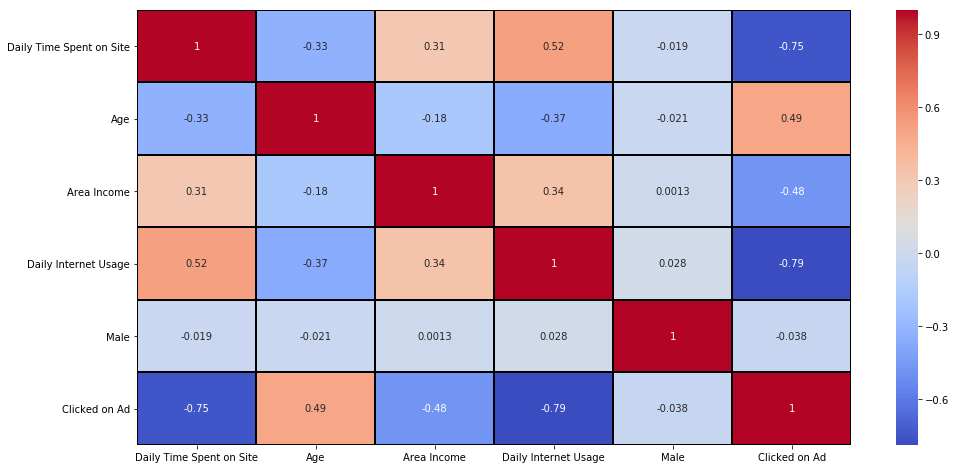

In [102]:
plt.figure(figsize = (16,8))
sns.heatmap(adv.corr(), annot = True, cmap = 'coolwarm', linewidths = '1', linecolor = "black")

Looking at the heatmap, we see a definite correlation between **Age **, **Daily Internet Usage** and **Daily Time spend on site**. So, we will definitely use these variables as our predictors in the model. Now, lets have a quick look at the pairplot.

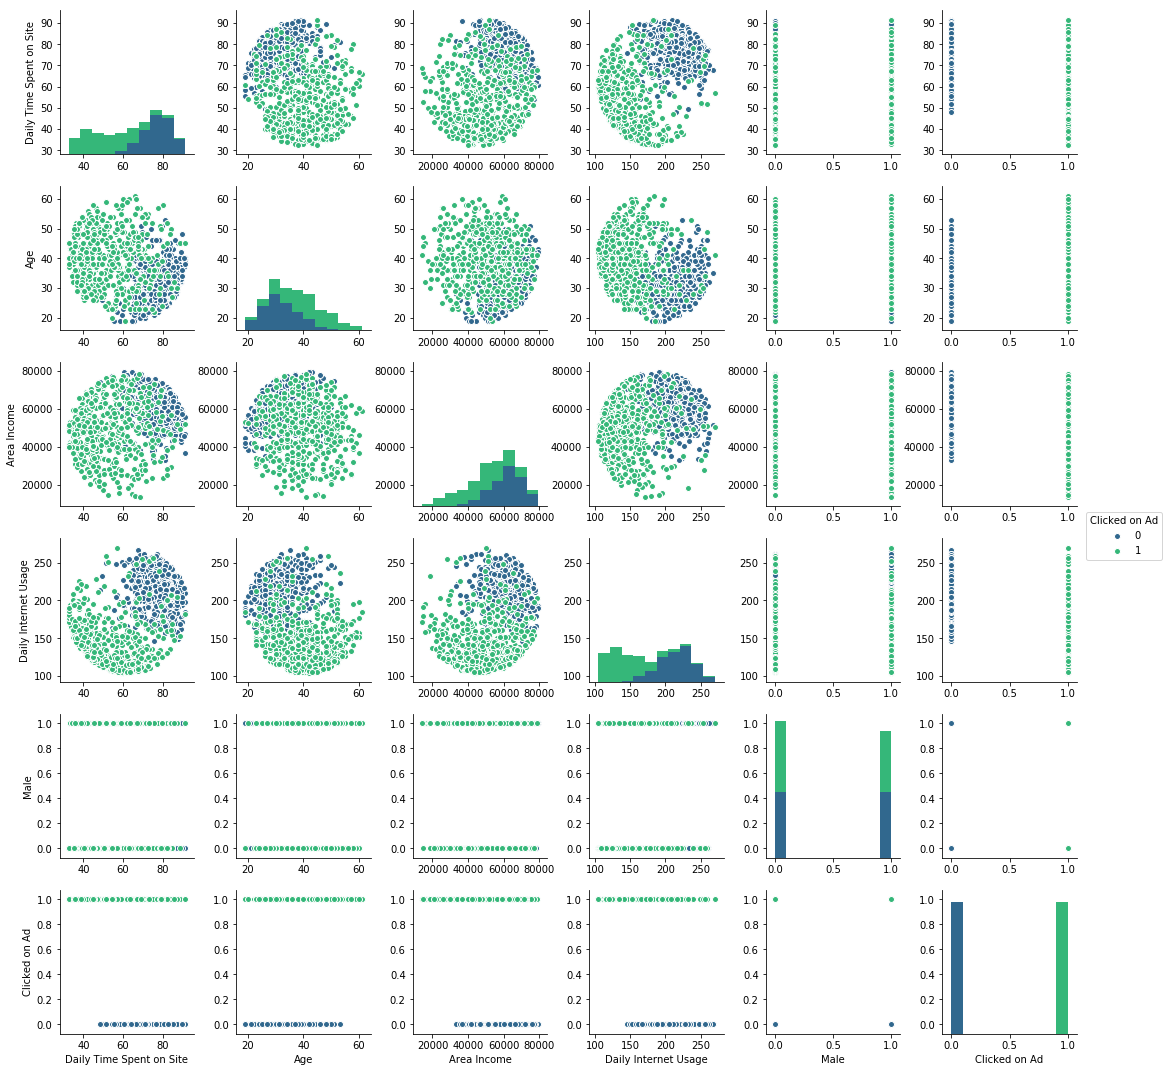

In [7]:
sns.pairplot(adv,hue='Clicked on Ad',palette='viridis')

**EDA**

Lets see some plots giving us an idea about the relationships between predictor variables.

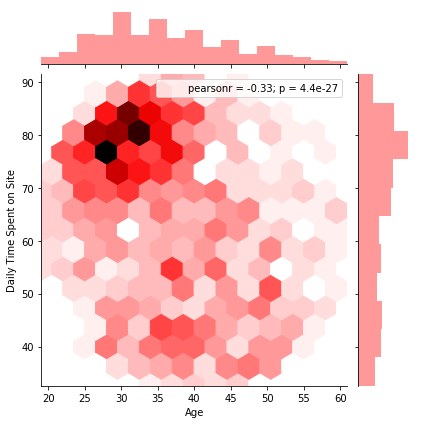

In [8]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=adv,color='red',kind='hex');

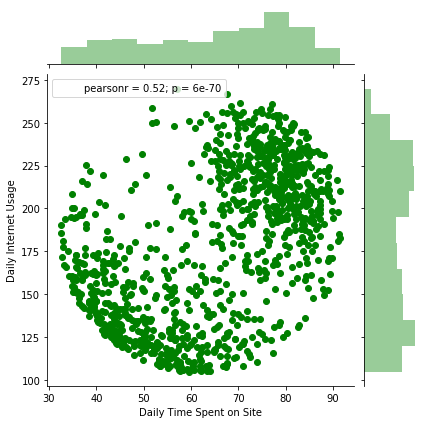

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=adv,color='green')

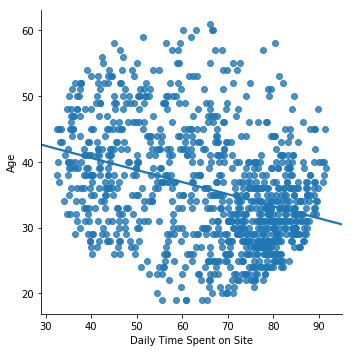

In [11]:
sns.lmplot(x='Daily Time Spent on Site', y='Age', data=adv, ci=None)

**Importing some more useful packages from sklearn.metrics**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [28]:
from sklearn.metrics import classification_report

**Defining predictor and outcome variable**

In [92]:
A = adv[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
b = adv['Clicked on Ad']

**Splitting testing and training data**

In [77]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.33, random_state=42)

**Creating and fitting our Logistic Model to the training data**

In [78]:
logmodel = LogisticRegression()
logmodel.fit(A_train,b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [103]:
print ("Logistic Accuracy is %2.2f" % accuracy_score(b_test, logmodel.predict(A_test)))

Logistic Accuracy is 0.91


**Model Evaluation**

A better metric for binary classifiers is AUC or Area under curve. For that we first have a look at the classification report of our model. _Precision_ and _Recall_ are two important values to observe.

- Precision (relevancy) : fraction of correctly identified examples of a class (ratio of true positives to all positives)
- Recall (completeness) : fraction of observations classified in that class that were correctly identified

In [81]:
print ("---Logistic Model---")
log_roc_auc = roc_auc_score(b_test, logmodel.predict(A_test))
print ("Logistic AUC: ", log_roc_auc )
print(classification_report(b_test,predictions))

---Logistic Model---
Logistic AUC:  0.910052910053
             precision    recall  f1-score   support

          0       0.87      0.88      0.87       162
          1       0.88      0.88      0.88       168

avg / total       0.88      0.88      0.88       330



**Plotting ROC curve**

In [83]:
fpr, tpr, thresholds = roc_curve(b_test, logmodel.predict_proba(A_test)[:,1])

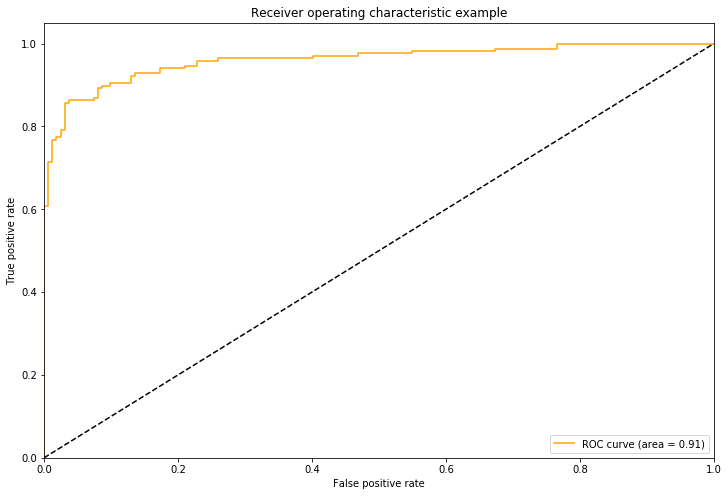

In [90]:
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label ="ROC curve (area = %0.2f)" % log_roc_auc, color ="orange")
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Our ROC accuracy is 91% and the AUC seems to be pretty decent. Hence, we can conclude that the model's performance is good.

**Regularization :**

We will be using L2 (ridge) regularization that comes default with the LogisticRegression() from Scikit-Learn and. We will play along with C value - a parameter to control the strength of regularization and see if Regularization helps our model.

- Higher C : correct classification of each data point
- Lower C: Logmodel adjusts to the majority of the data point

**Accuracy of our model :**

In [93]:
print("Accuracy on the training subset: {:.3f}".format(logmodel.score(A_train, b_train)))
print("Accuracy on the testing subset: {:.3f}".format(logmodel.score(A_test, b_test)))

Accuracy on the training subset: 0.900
Accuracy on the testing subset: 0.909


**Increasing C :**

In [95]:
logmodel100 = LogisticRegression(C=100)
logmodel100.fit(A_train, b_train)
print("Accuracy on the training subset: {:.3f}".format(logmodel100.score(A_train, b_train)))
print("Accuracy on the testing subset: {:.3f}".format(logmodel100.score(A_test, b_test)))

Accuracy on the training subset: 0.900
Accuracy on the testing subset: 0.909


**Decreasing C :**

In [98]:
logmodel001 = LogisticRegression(C=0.4)
logmodel001.fit(A_train, b_train)
print("Accuracy on the training subset: {:.3f}".format(logmodel001.score(A_train, b_train)))
print("Accuracy on the testing subset: {:.3f}".format(logmodel001.score(A_test, b_test)))

Accuracy on the training subset: 0.900
Accuracy on the testing subset: 0.909


Looking at the results, it doesnt seem like regularization is much of a use to our model since it is consistently performing close to 91% accuracy on testing subset.

## Is the relationship significant?

We used a person's features to predict if he/she was going to click on ad and our proposed model seems to functioning quite well at close to 91% accuracy. So the relationship is significant in all respects.

## Any model assumptions violated?

Logistic Regression Model Assumptions are as follows:

* Binary logistic regression requires the dependent variable to be binary: The dependent variable here is the field which specifies whether a person has clicked on an ad or not (1 or 0) 
* For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome : Value 1 corresponds to a person clicking on an ad
* Only the meaningful variables should be included : In our case we're trying to predict the outcome based off on its features so the rest of the columns such as Country, ad topic and timestamp have been dropped
* The predictor variables should be independent of each other. That is, the model should have little or no multicollinearity : There is a very little multicolinearity as seen in the heat map

Thus, no assumptions are violated.

## Cross validate the model. How well did it do?

In [118]:
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score

In [120]:
predicted = cross_validation.cross_val_predict(logmodel, A, b, cv=10)
metrics.accuracy_score(b, predicted) 
accuracy = cross_val_score(logmodel, A, b, cv=10,scoring='accuracy')
print ("Accuracy across 10 folds:",accuracy)
print ("Score after Cross Validation:", cross_val_score(logmodel, A, b, cv=10,scoring='accuracy').mean())

Accuracy across 10 folds: [ 0.94  0.91  0.88  0.86  0.9   0.89  0.9   0.87  0.93  0.9 ]
Score after Cross Validation: 0.898


Over 10 iterations, the accuracy is stable around 90% which is not so far from our original accuracy.

### CLUSTERING
---

**Importing packages**

In [3]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from collections import Counter
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import NearestNeighbors


We are using the same dataset used for Logistic Clustering

In [4]:
df = pd.DataFrame(adv)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


Creating a function to assign color bands to different cluster depending upon the labels generated.

In [5]:
def set_colors(labels, colors='rgbykcmw'):
    colored_labels = []
    for label in labels:
        if (label < 0) or (label > 6):
          colored_labels.append(colors[7]) 
        else:
          colored_labels.append(colors[label])
    return colored_labels

### KMeans Clustering
---


Counter({1: 617, 0: 383})


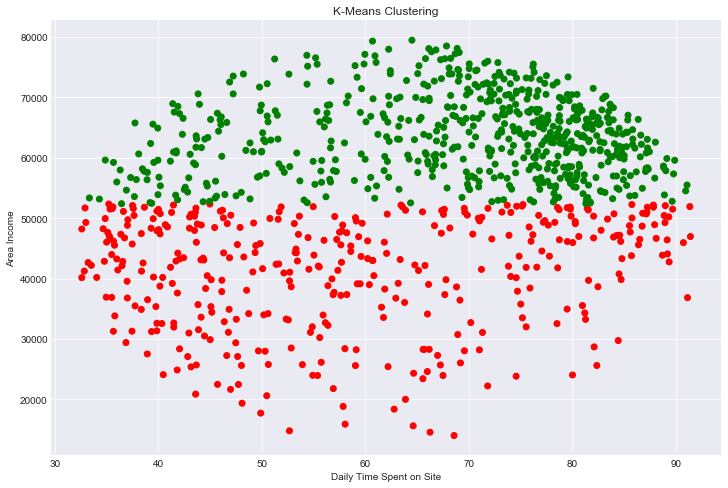

Silhouette Score for KMeans :  0.584087251602


In [6]:

plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
estimator1 = KMeans(n_clusters=2)
X = df[["Daily Time Spent on Site", "Area Income"]]
estimator1.fit(X)

labels = estimator1.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df["Daily Time Spent on Site"], df["Area Income"], c=colors)
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Area Income")
plt.title("K-Means Clustering")
plt.show()

print ("Silhouette Score for KMeans : ", metrics.silhouette_score(X, labels, metric='euclidean'))


### DBSCAN Clustering
---

DBScan proves to be a useful method clustering data in a dataset that contain clusters of similar density. Let's check if our database has something like that.

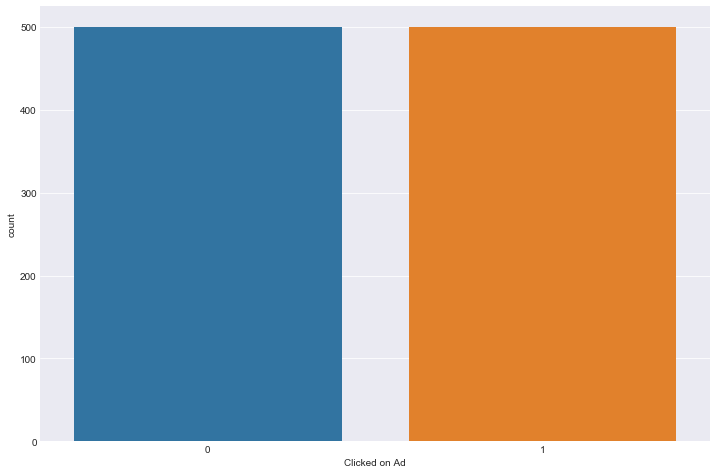

In [11]:
plt.figure(figsize= (12,8))
sns.countplot(df['Clicked on Ad'])

We see that our outcome variable 'Clicked on Ad' has equal number data points for our outcome i.e 0 or 1. So, DBScan looks like a good choice here.

Counter({0: 410, 1: 300, -1: 272, 3: 10, 2: 8})


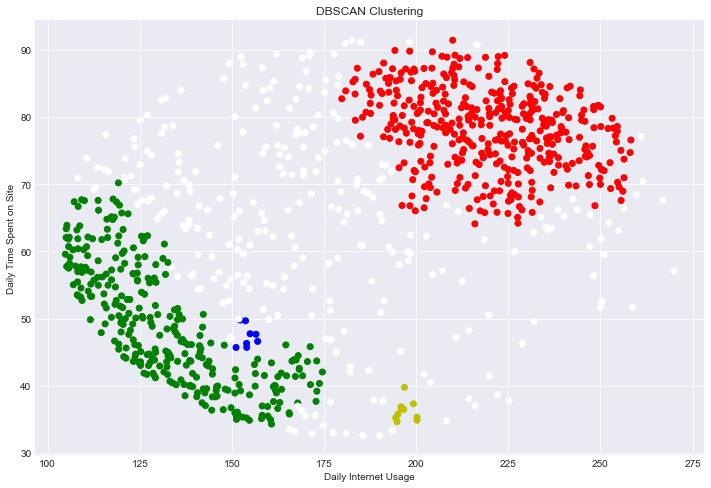

Silhouette Score for DBScan :  0.138842096607


In [16]:

plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
estimator2 = DBSCAN(eps=4, min_samples=10)
X = df[["Daily Time Spent on Site", "Daily Internet Usage"]]
estimator2.fit(X)

labels = estimator2.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df["Daily Internet Usage"], df["Daily Time Spent on Site"], c=colors)
plt.xlabel("Daily Internet Usage")
plt.ylabel("Daily Time Spent on Site")
plt.title("DBSCAN Clustering")
plt.show()

print ("Silhouette Score for DBScan : ", metrics.silhouette_score(X, labels, metric='euclidean'))


### Agglomerative Clustering
---

Counter({0: 783, 1: 217})


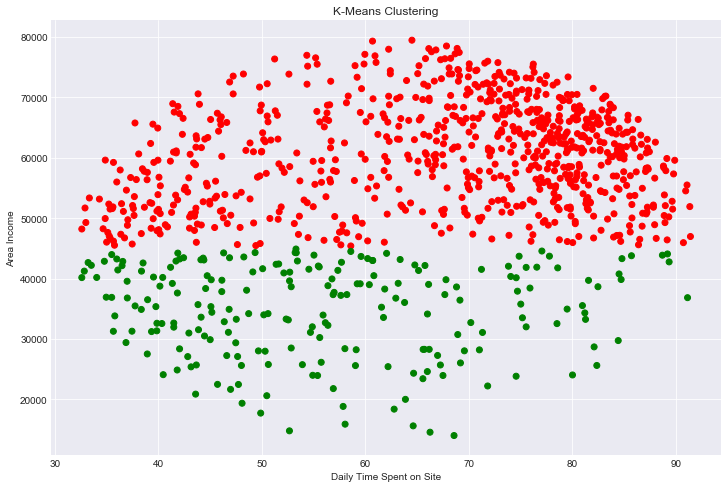

Silhouette Score for Spectral Clustering :  0.59320646226


In [18]:
plt.figure(figsize = (12,8))
sns.set_style('darkgrid')
estimator3 = AgglomerativeClustering(n_clusters=2)
X = df[["Daily Time Spent on Site", "Area Income"]]
estimator3.fit(X)

labels = estimator3.labels_
print (Counter(labels))

colors = set_colors(labels)
plt.scatter(df["Daily Time Spent on Site"], df["Area Income"], c=colors)
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Area Income")
plt.title("K-Means Clustering")
plt.show()

print ("Silhouette Score for Spectral Clustering : ", metrics.silhouette_score(X, labels, metric='euclidean'))


## Evaluation

** Create a new column for df called 'Cluster', which is a 1 for a ad being clicked, and a 0 for not being clicked.**

We do this step because, we have a label here to evaluate the clusters in our dataset, but this may not be case for every dataset in the real world. So for proper evaluation purposes, we do the following

In [19]:
def converter(cluster):
    if cluster=='1':
        return 1
    else:
        return 0

In [20]:
df['Cluster'] = df['Clicked on Ad'].apply(converter)

In [21]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Cluster
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,0


**KMeans :**

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
print("---Confusion Matrix for KMeans---")
print(confusion_matrix(df['Cluster'],estimator1.labels_))
print("---Classification Report for KMeans---")
print(classification_report(df['Cluster'],estimator1.labels_))

print("***********************************************************************")

print("---Confusion Matrix for DBSCAN---")
print(confusion_matrix(df['Cluster'],estimator2.labels_))
print("---Classification Report for DBSCAN---")
print(classification_report(df['Cluster'],estimator2.labels_))

print("***********************************************************************")

print("---Confusion Matrix for Agglomerative---")
print(confusion_matrix(df['Cluster'],estimator3.labels_))
print("---Classification Report for Agglomerative---")
print(classification_report(df['Cluster'],estimator3.labels_))

---Confusion Matrix for KMeans---
[[383 617]
 [  0   0]]
---Classification Report for KMeans---
             precision    recall  f1-score   support

          0       1.00      0.38      0.55      1000
          1       0.00      0.00      0.00         0

avg / total       1.00      0.38      0.55      1000

***********************************************************************
---Confusion Matrix for DBSCAN---
[[  0   0   0   0   0]
 [272 410 300   8  10]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
---Classification Report for DBSCAN---
             precision    recall  f1-score   support

         -1       0.00      0.00      0.00         0
          0       1.00      0.41      0.58      1000
          1       0.00      0.00      0.00         0
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0

avg / total       1.00      0.41      0.58      1000

******************************************************

C:\Users\chava\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Comparing 3 clustering methods, Agglomerative Clustering is the most effective for this dataset, with **High Precision**,**High Recall** and **F1-Score** close to 0.88

## Does clustering methods generate the same clusters?

No they do not, DBSCAN seems to create different clusters.